<a href="https://colab.research.google.com/github/FatihUlumuddin/ektrasi_fitur/blob/main/Ekstrasi_Fitur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

filename = list(uploaded.keys())[0]

img_pil = Image.open(filename).convert('RGB')
img_np = np.array(img_pil)

img_cv = cv2.imread(filename)


Saving index.jpg to index.jpg


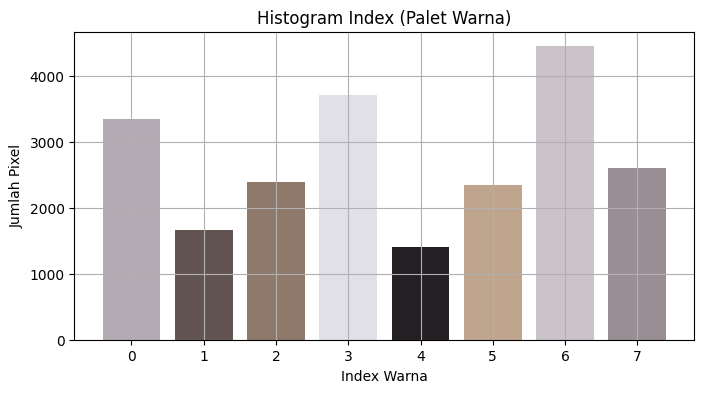

In [2]:
from sklearn.cluster import KMeans

pixels = img_np.reshape(-1, 3)

kmeans = KMeans(n_clusters=8, random_state=0).fit(pixels)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Buat histogram dari label
hist, bins = np.histogram(labels, bins=np.arange(9))

# Plot histogram index
plt.figure(figsize=(8,4))
plt.bar(range(8), hist, color=centroids/255)
plt.title("Histogram Index (Palet Warna)")
plt.xlabel("Index Warna")
plt.ylabel("Jumlah Pixel")
plt.grid(True)
plt.show()


Upload gambar referensi:


Saving index.jpg to index (1).jpg


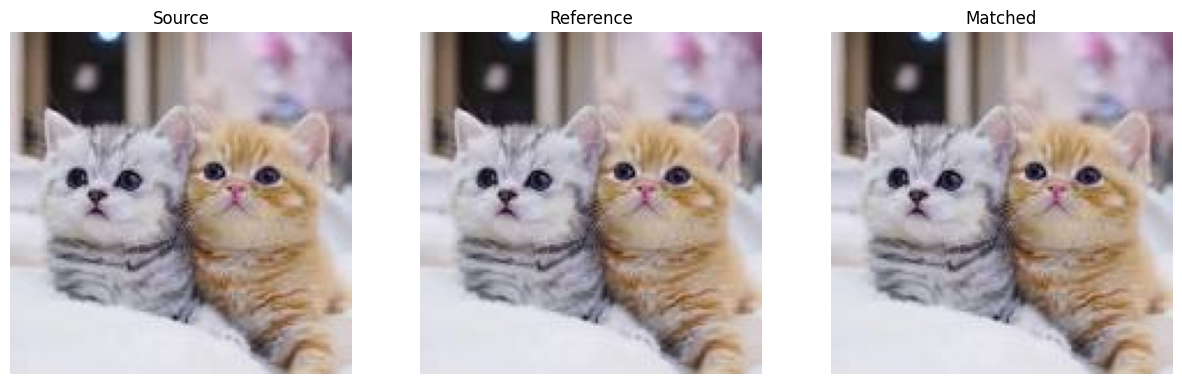

In [3]:
from skimage import exposure

# Upload gambar referensi
print("Upload gambar referensi:")
ref_upload = files.upload()
ref_filename = list(ref_upload.keys())[0]
ref_img_pil = Image.open(ref_filename).convert('RGB')
ref_np = np.array(ref_img_pil)

# Matching histogram dari img_np ke ref_np
matched = exposure.match_histograms(img_np, ref_np, channel_axis=-1)

# Tampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_np)
axes[0].set_title('Source')
axes[1].imshow(ref_np)
axes[1].set_title('Reference')
axes[2].imshow(matched)
axes[2].set_title('Matched')
for ax in axes:
    ax.axis('off')
plt.show()


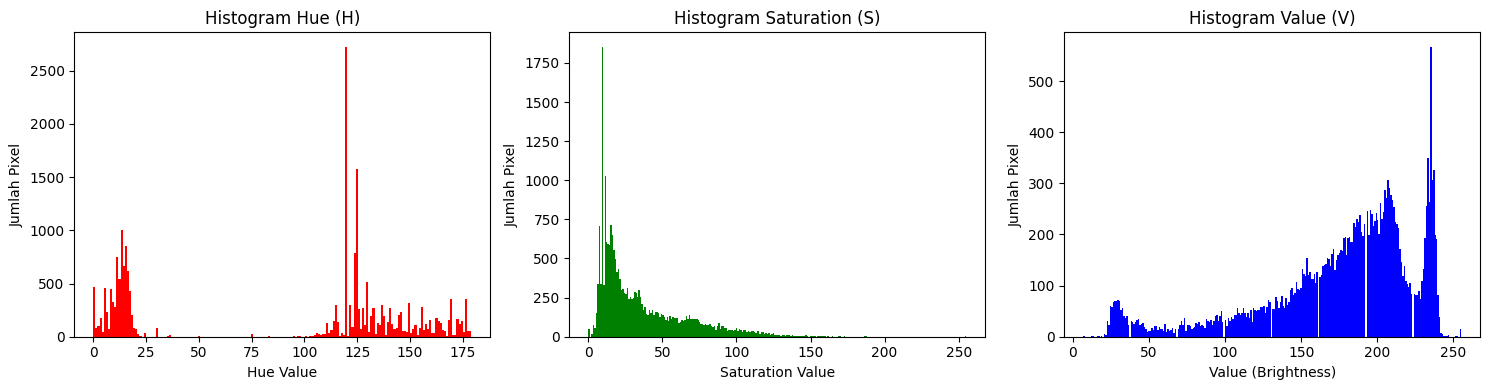

In [4]:
# Konversi gambar ke HSV
hsv_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

# Pisahkan channel HSV
h, s, v = cv2.split(hsv_img)

# Tampilkan histogram masing-masing channel
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(h.ravel(), bins=180, color='red')
plt.title("Histogram Hue (H)")
plt.xlabel("Hue Value")
plt.ylabel("Jumlah Pixel")

plt.subplot(1, 3, 2)
plt.hist(s.ravel(), bins=256, color='green')
plt.title("Histogram Saturation (S)")
plt.xlabel("Saturation Value")
plt.ylabel("Jumlah Pixel")

plt.subplot(1, 3, 3)
plt.hist(v.ravel(), bins=256, color='blue')
plt.title("Histogram Value (V)")
plt.xlabel("Value (Brightness)")
plt.ylabel("Jumlah Pixel")

plt.tight_layout()
plt.show()
